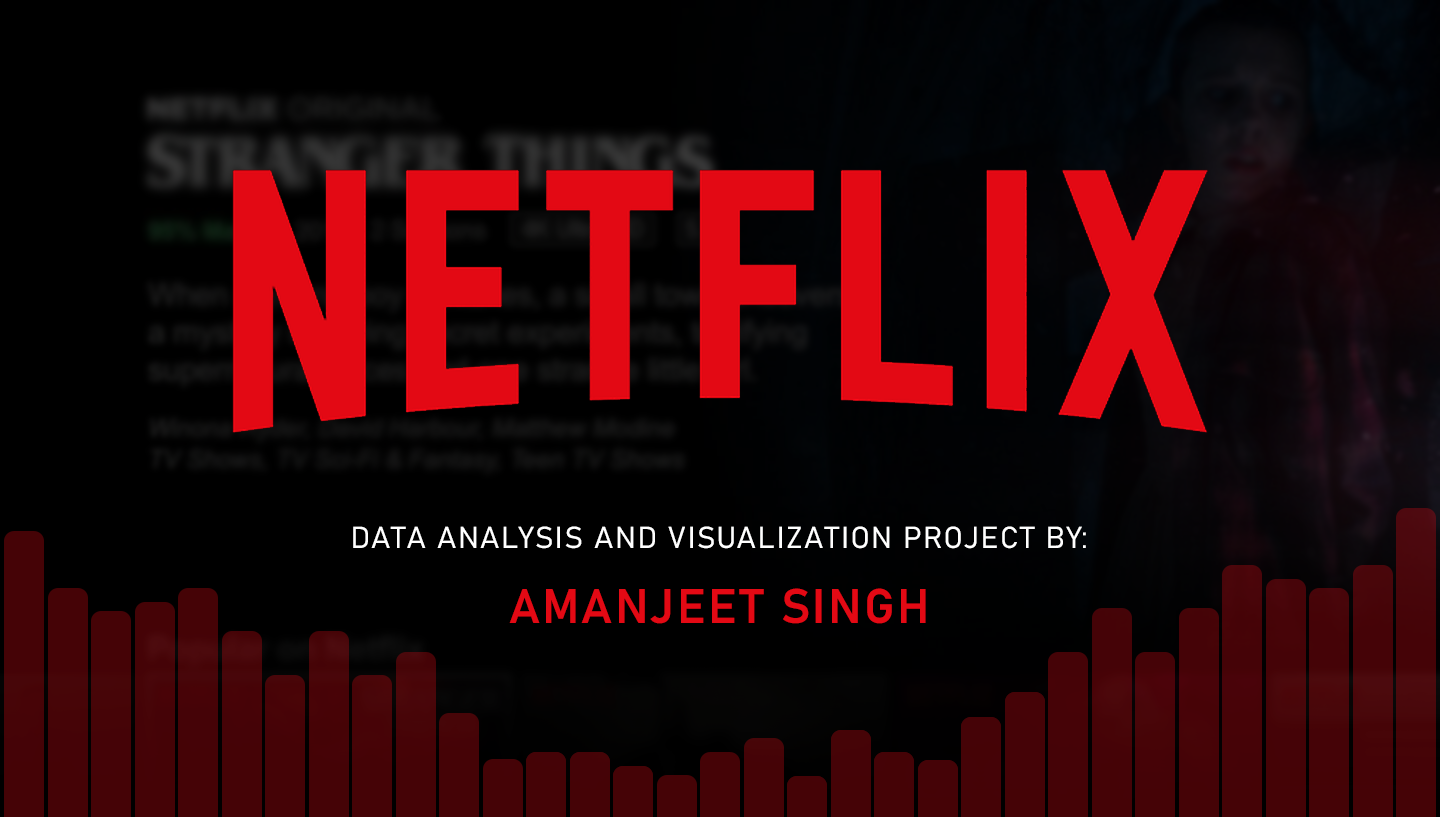

### Problem statement, importing libraries and loading the dataset.

The problem to be addressed through this project is to analyze this data to gain insights into user behavior and preferences, and to identify which type of shows/movies will help Netflix to grow their business in different countries.

After going through the Netflix dataset, we can find the type of content (such as Movie. TV Show), title, directors, cast, country or origin, date on which the content was added, release date of the content, content rating (such as PG-13, TV-MA etc.), duration/number of seasons (in case of TV Shows), genre and their description.

#### Importing libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

#### Loading the dataset

In [2]:
df = pd.read_csv("netflix.csv")

#### First 5 values


In [3]:
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


### Exploratory Data Analysis: Why It's Important ?

For solving any business case after collecting the data, we cannot
immediately go on the Visualisations or model-building phase. The Exploratory Data
Analysis (EDA) stage is crucial in helping us outline our strategy in an organised way.
Exploratory data analysis is the process of examining data, coming up with new ideas, and
spotting hidden patterns.

#### Shape of data

In [4]:
df.shape

(8807, 12)

#### Data types and non-null count of all the attributes

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      6173 non-null   object
 4   cast          7982 non-null   object
 5   country       7976 non-null   object
 6   date_added    8797 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8803 non-null   object
 9   duration      8804 non-null   object
 10  listed_in     8807 non-null   object
 11  description   8807 non-null   object
dtypes: int64(1), object(11)
memory usage: 825.8+ KB


#### Missing value detection

In [6]:
df.isnull().sum().sort_values(ascending = False)

director        2634
country          831
cast             825
date_added        10
rating             4
duration           3
show_id            0
type               0
title              0
release_year       0
listed_in          0
description        0
dtype: int64

In [7]:
round((df.isnull().sum()/df.shape[0]*100),2).sort_values(ascending = False)

director        29.91
country          9.44
cast             9.37
date_added       0.11
rating           0.05
duration         0.03
show_id          0.00
type             0.00
title            0.00
release_year     0.00
listed_in        0.00
description      0.00
dtype: float64

#### Statistical summary

In [8]:
df.describe()

,release_year
count,8807.000000
mean,2014.180198
std,8.819312
min,1925.000000
25%,2013.000000
50%,2017.000000
75%,2019.000000
max,2021.000000


In [9]:
df.describe(include='object').T

,count,unique,top,freq
show_id,8807,8807,s1,1
type,8807,2,Movie,6131
title,8807,8807,Dick Johnson Is Dead,1
director,6173,4528,Rajiv Chilaka,19
cast,7982,7692,David Attenborough,19
country,7976,748,United States,2818
date_added,8797,1767,"January 1, 2020",109
rating,8803,17,TV-MA,3207
duration,8804,220,1 Season,1793
listed_in,8807,514,"Dramas, International Movies",362


### Movies vs TV Shows

In [10]:
# Segregation of Movies and TV Shows
df_movie = df[df["type"] == "Movie"].reset_index()
df_tv_show = df[df["type"] == "TV Show"].reset_index()

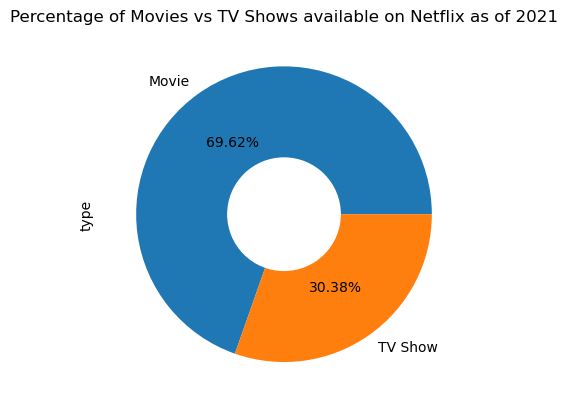

In [13]:
# Pie chart of number of Movies vs TV Shows
plt.title("Percentage of Movies vs TV Shows available on Netflix as of 2021")
df['type'].value_counts().plot(kind = "pie", autopct="%.2f%%")
circle = plt.Circle((0, 0), 0.38, color='white')
plt.gcf().gca().add_artist(circle)
plt.show()

- According to the available data, movies represent nearly 70% and TV shows represent nearly 30% of the total number of available content until 2021.

### Top 10 directors

In [ ]:
# Unnesting the 'director' column into multiple rows to get the value count of individual directors
df_dir = df[["director"]]
df_dir["director"] = df_dir["director"].str.split(", ")
df_dir = df_dir.explode("director")

#### Number of unique directors

In [ ]:
df_dir["director"].nunique()

#### Top 10 directors by the number of Movies/TV Shows directed

In [ ]:
df_dir["director"].value_counts().head(10)

In [ ]:
sns.set(rc={'axes.facecolor':'lightgrey'})
d = sns.countplot(palette = "crest", y = df_dir["director"], order = pd.value_counts(df_dir["director"]).head(10).index)
plt.title("Top 10 directors based on number of titles directed")
d.set_xlabel('No. of titles')
d.set_ylabel('Directors')
plt.show()

- Rajiv Chilaka, Jan Suter and Raúl Campos have directed most number of titles. 

### Top 10 actors

In [ ]:
# Unnesting the 'cast' column into multiple rows to get the value count of individual actors
df_actor = df[["cast","type"]]
df_actor["cast"] = df_actor["cast"].str.split(", ")
df_actor = df_actor.explode("cast")

#### Number of unique actors

In [ ]:
df_actor["cast"].nunique()

#### Top 10 actors by the number of Movies

In [ ]:
df_actor_mov = df_actor[df_actor['type']=='Movie'].value_counts().reset_index()
df_actor_mov = df_actor_mov.rename(columns = {0:'count'})
df_10 = df_actor_mov.head(10)
df_10

In [ ]:
sns.set(rc={'axes.facecolor':'lightgrey'})
a = sns.barplot(palette = "icefire", y = df_10["cast"], x = df_10["count"])
plt.title("Top 10 actors based on number of Movies")
a.set_xlabel('No. of movies')
a.set_ylabel('Actors')
plt.show()

- Anupam Kher has acted in the most number of Movies followed by Shah Rukh Khan and Naseeruddin Shah.
- All of the top 10 actors based on number of Movies are from India.

#### Top 10 actors by the number of TV Shows

In [ ]:
df_actor_tv = df_actor[df_actor['type']=='TV Show'].value_counts().reset_index()
df_actor_tv = df_actor_tv.rename(columns = {0:'count'})
df_tv_10 = df_actor_tv.head(10)
df_tv_10

In [ ]:
sns.set(rc={'axes.facecolor':'lightgrey'})
a = sns.barplot(palette = "viridis", y = df_tv_10["cast"], x = df_tv_10["count"])
plt.title("Top 10 actors based on number of TV Shows")
a.set_xlabel('No. of TV Shows')
a.set_ylabel('Actors')
plt.show()

- According to the above analysis, Takahiro Sakurai has acted in the most number of TV Shows, followed by Yuji Kaji and Junichi Suwabe.
- Here we can see that 9 out of the top 10 TV Show actors are of Japanese origin.

### Top 10 countries

In [ ]:
# Unnesting the 'country' column into multiple rows to get the value count of individual countries
df_country = df[["title","country"]]
df_country["country"] = df_country["country"].str.split(", ")
df_country = df_country.explode("country")

#### Number of unique countries

In [ ]:
df_country["country"].nunique()

#### Top 10 countries by the number of Movies/TV Shows directed

In [ ]:
df_country["country"].value_counts().head(10)

#### Percentage contribution of Top 10 countries to the total content of Netflix

In [ ]:
total_count = df['title'].value_counts().sum()
total_top_5 = df_country["country"].value_counts().head(10).sum()
print(round((total_top_5/total_count)*100, 2),"%")

#### Percentage contribution of Top 5 countries to the total content of Netflix

In [ ]:
total_count = df['title'].value_counts().sum()
total_top_5 = df_country["country"].value_counts().head(5).sum()
print(round((total_top_5/total_count)*100, 2),"%")

#### Percentage contribution of Top 3 countries to the total content of Netflix

In [ ]:
total_count = df['title'].value_counts().sum()
total_top_5 = df_country["country"].value_counts().head(3).sum()
print(round((total_top_5/total_count)*100, 2),"%")

#### Percentage contribution of United States to the total content of Netflix

In [ ]:
total_count = df['title'].value_counts().sum()
total_top_5 = df_country["country"].value_counts().head(1).sum()
print(round((total_top_5/total_count)*100, 2),"%")

In [ ]:
plt.figure(figsize = (11,6))
sns.set(rc={'axes.facecolor':'lightgrey'})
c = sns.countplot(palette = "hls", x = df["country"], hue=df['type'], order = pd.value_counts(df_country["country"]).head(10).index)
plt.title("Top 10 countries based on amount of content")
c.set_ylabel('No. of titles')
c.set_xlabel('Country')
plt.show()

According to the data available:
- The above top 10 countries contribute 85.76% of the total content.
- United States, India, United Kingdom, Canada and France contribute 72.41% of the total content.
- United States alone contributes to 41.9% of the total content on Netflix.

### Top 10 genres

In [ ]:
# Unnesting the 'country' column into multiple rows to get the value count of individual countries
df_listed = df[["type","listed_in"]]
df_listed["listed_in"] = df_listed["listed_in"].str.split(", ")
df_listed = df_listed.explode("listed_in")

#### Number of unique genres

In [ ]:
df_listed["listed_in"].nunique()

#### Top 10 genres for the Movies

In [ ]:
df_mov_gen = df_listed[df_listed['type']=='Movie']
df_mov_gen.value_counts().head(10)

In [ ]:
sns.set(rc={'axes.facecolor':'lightgrey'})
g = sns.countplot(palette="viridis",y=df_mov_gen["listed_in"], order=pd.value_counts(df_mov_gen["listed_in"]).head(10).index)
plt.title("Top 10 genres for the movies based on number of titles")
g.set_xlabel('No. of titles')
g.set_ylabel('Genres')
plt.show()

#### Top 10 genres for the TV Shows

In [ ]:
df_tv_gen = df_listed[df_listed['type']=='TV Show']
df_tv_gen.value_counts().head(10)

In [ ]:
sns.set(rc={'axes.facecolor':'lightgrey'})
g = sns.countplot(palette="viridis",y=df_tv_gen["listed_in"], order=pd.value_counts(df_tv_gen["listed_in"]).head(10).index)
plt.title("Top 10 genres for the TV Shows based number of titles")
g.set_xlabel('No. of titles')
g.set_ylabel('Genres')
plt.show()

### Year wise amount of content release for the past 30 years (1992 - 2021)

In [ ]:
df["release_year"].value_counts().head(30)

In [ ]:
year_wise = pd.value_counts(df["release_year"]).reset_index().head(30)
year_wise.rename(columns={"index":"Year of release","release_year":"No. of titles"}, inplace = True)

In [ ]:
plt.figure(figsize = (10,6))
sns.set(rc={'axes.facecolor':'lightgrey'})
y = sns.barplot(x = "Year of release", y = "No. of titles", data = year_wise)
plt.title("Year wise release of Movie/TV Shows (2002 - 2021)")
plt.xticks(rotation = 40, fontsize = 10)
plt.yticks()
plt.show()

- Starting from 2014, there is huge increase in the number of Movies/TV Shows released, peaking in the year 2018 and declining after 2018 with a sharp decline from the year 2020 to 2021.
- The possible reason for the sharp decline in the Movie/TV Shows released could be disruption in Movie/TV Shows production.

### Comparison of Movies and TV Shows released in last 30 years (from year 1992 - 2021)

In [ ]:
# Segregation of 'Movies' and 'TV Shows' columns and count of content released
year_wise = pd.value_counts(df["release_year"]).reset_index().head(30)
year_wise.rename(columns={"index":"Year of release","release_year":"No. of titles"}, inplace = True)

df_mov_tv_rel = df[['type', 'release_year']]

df_mov_tv_rel = df_mov_tv_rel.value_counts().reset_index()
df_mov_tv_rel.rename(columns  = {0: 'count'}, inplace = True)

df_mov_tv_rel = df_mov_tv_rel[df_mov_tv_rel["release_year"]>=1992]

#### Top 5 years when the most number movies were released

In [ ]:
df_mov_tv_rel[df_mov_tv_rel['type']=='Movie'].head()

#### Top 5 years when the most number TV Shows were released

In [ ]:
df_mov_tv_rel[df_mov_tv_rel['type']=='TV Show'].head()

In [ ]:
# Dual lineplot of Movies vs TV Shows
plt.figure(figsize = (10, 6))
a = sns.lineplot(data=df_mov_tv_rel, x="release_year", y="count", legend='auto', palette = 'viridis',hue ='type',linewidth = 2, marker = 'o')
for i, j in zip(df_mov_tv_rel["release_year"], df_mov_tv_rel["count"]):
    a.text(i, j, str(j), fontsize = 10) 
plt.title("Year wise count of content release (1992 - 2021)")
a.set_ylabel('Release count')
a.set_xlabel('Release Year')
plt.show()

- Most number of movies were released in 2017 and 2018 with a count of 767 having a significant drop after 2018. 
- Most number of TV Shows were released in 2020 with a count of 436 and dropping after. 

### Days on which content is added every month

In [ ]:
# Extracting the months and years from the 'date_added' column to plot a heatmap for correlation
Date = df[['date_added']].dropna()
Date['date'] = Date['date_added'].apply(lambda x : x.lstrip().split(' ')[1].replace(',',''))
Date['month'] = Date['date_added'].apply(lambda x : x.lstrip().split(' ')[0])
Date['year'] = Date['date_added'].apply(lambda x : x.split(', ')[-1])
Order_Of_Month = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December'][::-1]
df_h = Date.groupby('year')['month'].value_counts().unstack().fillna(0)[Order_Of_Month].T[::-1]

In [ ]:
Date['date'].value_counts()

In [ ]:
perc_1 = (Date['date'].value_counts()[0]/Date['date'].value_counts().sum())*100
print((round(perc_1,2)),"%")

In [ ]:
perc_15 = (Date['date'].value_counts()[1]/Date['date'].value_counts().sum())*100
print((round(perc_15,2)),"%")

In [ ]:
perc_15 = (Date['date'].value_counts()[-1]/Date['date'].value_counts().sum())*100
print((round(perc_15,2)),"%")

In [ ]:
# Kernel Density Plot of the dates on which the most amount of content was added
plt.figure(figsize = (8, 6))
sns.distplot(Date['date'], color = 'crimson')
plt.title("KDE plot of the dates for the content added")
plt.show()

- It can be seen that new content is added on the 1st day of the month most number of times (nearly 25% or about 1/4th of the times), followed by 15th day of the month (7.8%).
- Day 29, 11 and 9 consists of the lowest amount of new content added (about 1.6%).

### Correlation of Years and Months of the content added

In [ ]:
plt.figure(figsize = (14, 8))
sns.heatmap(data = df_h, cmap="flare", annot= True, edgecolor = 'black', fmt=".0f", linewidth = 0.5)
plt.title("Correlation of Years and Months of the content added on Netflix", fontsize = 15)
plt.show()

- Most amount of content was added in July 2021 (257 titles) followed by November 2019 (255 titles).
- There is a significant growth in the content added on Netflix starting from the year 2016.

### Month wise content added

In [ ]:
Month = df[['date_added']].replace(np.nan,'No_date')
Month["Release_month"] = Month['date_added'].apply(lambda x: x.lstrip().split(" ")[0])

In [ ]:
Month["Release_month"].value_counts().head(12)

In [ ]:
plt.figure(figsize = (8,5))
sns.set(rc={'axes.facecolor':'lightgrey'})
m = sns.countplot(palette = "viridis", x = Month["Release_month"], order = pd.value_counts(Month["Release_month"]).head(12).index)
plt.title("Month wise number of titles added")
m.set_ylabel('No. of titles')
m.set_xlabel('Months')
plt.xticks(rotation = 30, fontsize = 11)
plt.show()

In [ ]:
plt.figure(figsize = (10,6))
sns.set(rc={'axes.facecolor':'lightgrey'})
m = sns.countplot(palette = "viridis", x = Month["Release_month"], hue=df['type'], order = pd.value_counts(Month["Release_month"]).head(12).index)
plt.title("Month wise number of titles added")
m.set_ylabel('No. of titles')
m.set_xlabel('Months')
plt.xticks(rotation = 30, fontsize = 11)
plt.show()

For Movies and TV Shows combined:
- Most amount of content was added in July, December and September.
- Least amount of content was added in February, May and November.

For Movies:
- Most number of movies were added in July, April and January.
- Least number of movies were added in February, June and May.

For TV Shows:
- Most number of TV Shows were added in December, July and September.
- Least number of TV Shows were added in February, January and May.


### Top 10 directors based on number of movies

In [ ]:
mov_dir = df_movie[["director"]]
mov_dir["director"] = mov_dir["director"].str.split(", ")
mov_dir = mov_dir.explode("director")

In [ ]:
mov_dir["director"].value_counts()[1:10]

In [ ]:
sns.set(rc={'axes.facecolor':'lightgrey'})
d = sns.countplot(palette = "viridis", y = mov_dir["director"], order = pd.value_counts(mov_dir["director"])[1:11].index)
plt.title("Top 10 directors based on number of movies")
d.set_xlabel('No. of movies')
d.set_ylabel('Directors')
plt.show()

### Top 10 directors based on number of TV Shows

In [ ]:
tv_dir = df_tv_show[["director"]]
tv_dir["director"] = tv_dir["director"].str.split(", ")
tv_dir = tv_dir.explode("director")

In [ ]:
plt.figure(figsize = (4,5))
sns.set(rc={'axes.facecolor':'lightgrey'})
d = sns.countplot(palette = "magma", y = tv_dir["director"], order = pd.value_counts(tv_dir["director"])[1:11].index)
plt.title("Top 10 directors based on number of TV Shows")
d.set_xlabel('No. of TV Shows')
d.set_ylabel('Directors')
plt.show()

### Correlation between type and rating

In [ ]:
plt.figure(figsize=(8,5))
mvt = sns.countplot(palette = "rainbow", x=df['rating'],hue=df['type'],order = pd.value_counts(df["rating"]).head(10).index)
mvt.set_xlabel('Rating')
mvt.set_ylabel('No. of titles')
plt.title('Relation between Type and Rating')
plt.show()

- TV-Y :Designed to be appropriate for all children
- TV-Y7 :Suitable for ages 7 and up
- G :Suitable for General Audiences
- TV-G :Suitable for General Audiences
- PG: Parental Guidance suggested
- TV-PG: Parental Guidance suggested
- PG-13:Parents strongly cautioned. May be inappropriate for ages under 13.
- TV-14 : Parents strongly cautioned. May not be suitable for ages under 14.
- R : Restricted. May be inappropriate for ages under 17.
- TV-MA : For Mature Audiences
- NC-17 : Inappropriate for ages 17 and under

- TV-MA rating has the highest number of Movies and TV Shows available followed by TV-14 rating.

### Categorical analysis on the duration of Movies

In [ ]:
df_movie = df[df["type"] == "Movie"].reset_index()

df_movie['duration'] = df_movie['duration'].astype(str).str.replace(' min', '')

In [ ]:
df_movie['duration'].dropna()

In [ ]:
df_movie['duration'] = df_movie['duration'].astype(float)

In [ ]:
round(df_movie['duration'].describe(),2)

In [ ]:
lbl = sns.boxplot(df_movie['duration'])
plt.title('Categorical analysis on the duration of Movies')
lbl.set_ylabel('Duration')
plt.show()

- The average duration of movies lies roughly between 87 to 114 minutes.
- The minimum and maximum duration of the movies represented by the whiskers of the boxplot is around 50 minutes and 150 minutes repectively.
- There are few outliers in the duration of movies such as 3 minutes for the lowest value and 312 as the highest value.


In [ ]:
plt.figure(figsize=(10,6))

df_tv_show = df[df["type"] == "TV Show"].reset_index()

tv=sns.countplot(palette="rainbow",x=df_tv_show['duration'],order=pd.value_counts(df_tv_show['duration']).index)
plt.xticks(rotation = 30)
for p in tv.patches:
        tv.annotate(str(p.get_height()), (p.get_x() * 1.005, (p.get_height() * 1.005)))
plt.title("TV Shows duration ")
tv.set_xlabel('Number of seasons')
tv.set_ylabel('Number of TV Shows')

plt.show()

df_tv_show=df.loc[(df["type"]=="TV Show")].reset_index()
df_tv_show.columns.name=None

In [ ]:
tv_s1 = df_tv_show[df_tv_show['duration']=='1 Season']
print(round((tv_s1['duration'].value_counts().sum()/df_tv_show['duration'].value_counts().sum()*100),2),"%")

- The above bar plot shows there are 1793 TV Shows that have only 1 Season which is 67% of the total.
- Whereas, only a few shows have more than 10 seasons.
- There is only one show which has 17 Seasons

## Business insights

- 70% of the content available on Netflix belongs to the Movie category while the TV Shows consist of the rest 30%.
- Rajiv Chilaka, Jan Suter and Raúl Campos have directed most amount of titles among Movies and TV Shows.
- Anupam Kher has acted in the most number of Movies followed by Shah Rukh Khan and Naseeruddin Shah.
- All of the top 10 actors based on number of Movies are of Indian origin.
- 9 out of the top 10 TV Show actors are of Japanese origin.
- United States, India, United Kingdom, Canada and France contribute 72.41% of the total content.
- United States alone contributes to 41.9% of the total content on Netflix.
- Interenational movies is the most watched genre among all the movies and International TV Shows is the most watched genre among all the TC shows available on Netflix.
- The amount of content was higher in the 'first 3 months' and the 'last 3 months' of the year.
- Least amount of content was added in the month of February.
- Most number of movies were added in the months of July, December, April, october and January.
- Most number of TV Shows were added in the months of July and December.
- Most content was added to Netflix on the 1st date of the month.
- Most amount of content was added in July 2021 (257) followed by November 2019(255).
- There was a significant growth in content added on Netflix from 2016.
- TV-MA rating has the highest number of Movies and TV Shows available followed by TV-14 rating.
- The average duration of movies was between 80 to 120 minutes.
- When analyzed that 1793 TV Shows have only 1 Season. Whereas, there were only a few TV Shows which have more than 10 seasons.

### Recommendations:

#### 1. Which countries to target?
- United States, India, United Kingdom, Canada and France contribute 72.41% of the total content. So including content produced from these countries is recommended.

#### 2. Which Movie/TV Show genre to add?
- International Movies, Dramas, Comedies are the top 3 genres for Movies on Netflix.
- International TV Shows, TV Dramas, TV Comedies are the top 3 genres for TV Shows on Netflix.

#### 3. Average duration of the Movie/TV shows?
- Around 87 to 114 minutes for the movies
- 67% of the total number of TV Shows have only 1 Season. Not more than 3 seasons is recommended.

#### 4. In which month to add a Movie/TV show?
- For Movies, most months are suitable however, February, May and June should be looked into as they have the least amount of Movies added.
- For TV Shows, most months are suitable however, January, February and May should be looked into as they have the least amount of TV Shows added.

#### 5. Which directors can be preferred for Movies/TV Shows?
- Rajiv Chilaka, Jan Suter, Raul Campos, Suhas Kadav and Marcus Raboy are top 5 most recurring directors that can be preferred.

#### 6. Which actors can be considered Movies/TV Shows?
- Anupam Kher, Shah Rukh Khan, Naseeruddin Shah, Akshay Kumar and Om Puri are the top 5 most recurring Movie actors. 
- Takahiro Sakurai, Yuji Kaji, Junichi Suwabe, Daisuke Ono and Ai Kayano are the top 5 most recurring TV Shows actors.

#### 7. When to add new content?
- Usually 1st day of the month is most recurring day when new content is added however, 15th day of the month can also be considered as a second option which is considerably less than 1st day of the month.

#### 8. Which rating to consider?
- TV-MA is the most recurring rating for Movies as well as TV-Shows, so it is most recommended.

### Additional point to be considered:
There is a significant drop in the amount of movies added to the Netflix after 2018 and for TV shows there is a drop after 2020, which must be looked into while making future business regarding adding content to Netflix. 
